warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


Text(0.5, 0, 'y')

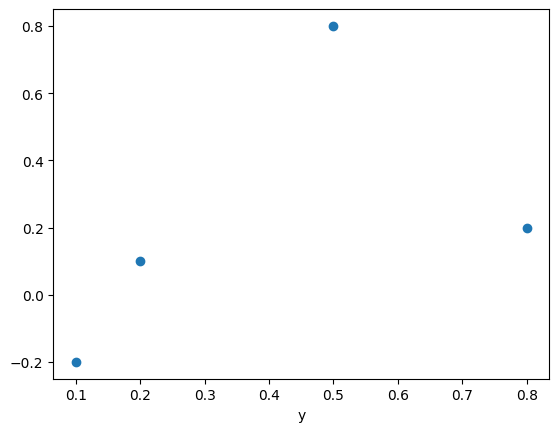

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import GPy


X_init = np.array([0.1,0.2,0.5,0.8])
Y_init = np.array([-0.2,0.1,0.8,0.2])

plt.scatter(X_init,Y_init)
plt.xlabel('x')
plt.xlabel('y')

zeta is:  100.0
zeta is:  0.5


Text(0.5, 0, 'x')

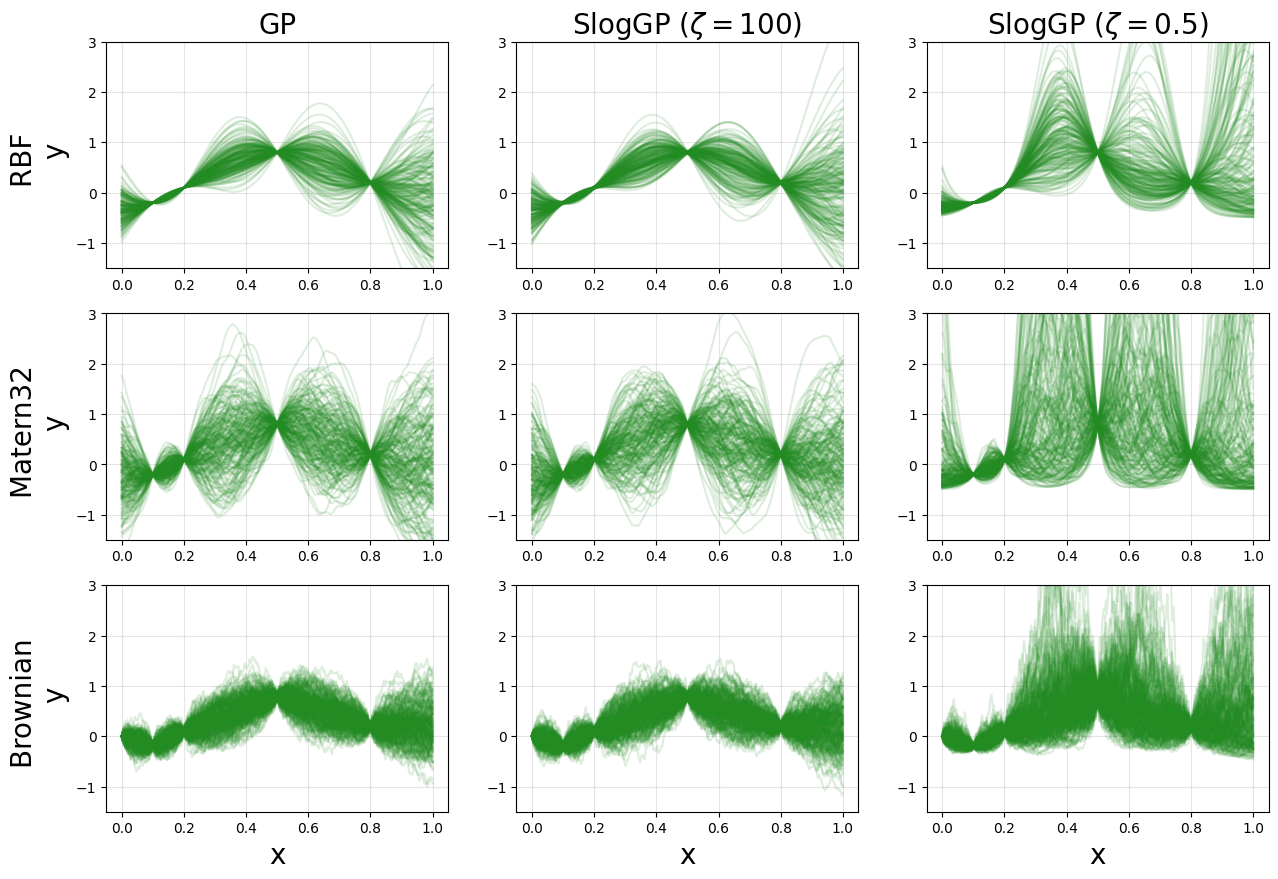

In [6]:
Num = 200

X_init = np.array([0.1,0.2,0.5,0.8])
Y_init = np.array([-0.2,0.1,0.8,0.2])


plt.figure(figsize=(15,10))

plt.subplot(3, 3, 1)

tilde_lengthscale_gp = 0.2
tilde_sigma_g = 1
tilde_signal_variance_gp = tilde_sigma_g**2
tilde_mu_g = 0

kernel = GPy.kern.RBF(input_dim=1,lengthscale= tilde_lengthscale_gp,variance=tilde_signal_variance_gp)
Y_train = Y_init
m = GPy.models.GPRegression(X_init.reshape(-1,1), Y_train.reshape(-1,1),kernel)
m.Gaussian_noise.variance.fix(0.)


X_total = np.linspace(0,1,400).reshape(-1,1)
GP_sample = []
for _ in range(Num):
    sample_gp = m.posterior_samples_f(X_total,size=1).reshape(-1,1) + tilde_mu_g
    plt.plot(X_total,sample_gp,color='forestgreen',alpha=0.15)
    GP_sample.append(sample_gp)

plt.ylabel('RBF \n y',fontsize=20)
plt.ylim([-1.5,3.])

plt.grid(color='grey',alpha=0.2)
# plt.title(r'GP ($\tilde{\sigma}_g^2=1$)',fontsize=20)
plt.title(r'GP',fontsize=20)


plt.subplot(3, 3, 2)
sigma_g = 0.01 # according to theorem 3.1, we need to have sigma_g -> 0, so here we set sigma_g to be a small positive number
lengthscale_g = 0.2
mu_g = np.log(tilde_sigma_g/sigma_g)
zeta = tilde_sigma_g/sigma_g - tilde_mu_g # zeta is 100
print('zeta is: ',zeta) # here we print zeta value

kernel = GPy.kern.RBF(input_dim=1,lengthscale= lengthscale_g,variance=sigma_g**2)  
Y_train = np.log(Y_init+zeta)-mu_g
m = GPy.models.GPRegression(X_init.reshape(-1,1), Y_train.reshape(-1,1),kernel)
m.Gaussian_noise.variance.fix(0)

X_total = np.linspace(0,1,400).reshape(-1,1)
for _ in range(Num):
    sample_gp = m.posterior_samples_f(X_total,size=1).reshape(-1,1)
    sample_sloggp = np.exp(sample_gp+mu_g)-zeta # a SlogGP f is defined as f(x)=e^{g(x)+mu_g}-zeta
    plt.plot(X_total,sample_sloggp,color='forestgreen',alpha=0.15)
    


plt.grid(color='grey',alpha=0.2)
plt.ylim([-1.5,3.])
# plt.title('SlogGP ($\sigma_g^2=0.01^2$)',fontsize=20)
plt.title('SlogGP ($\zeta=100$)',fontsize=20)


plt.subplot(3, 3, 3)

sigma_g = 2
lengthscale_g = 0.2
mu_g = np.log(tilde_sigma_g/sigma_g)
zeta = tilde_sigma_g/sigma_g - 0 # zeta is 0.5
print('zeta is: ',zeta) # here we print zeta value

kernel = GPy.kern.RBF(input_dim=1,lengthscale= lengthscale_g,variance=sigma_g**2)  # here we set variance to be 1 and the sigma_g will be multiplied later to guarantee numerical stability
Y_train = np.log(Y_init+zeta)-mu_g
m = GPy.models.GPRegression(X_init.reshape(-1,1), Y_train.reshape(-1,1),kernel)
m.Gaussian_noise.variance.fix(1e-10)

X_total = np.linspace(0,1,400).reshape(-1,1)
for _ in range(Num):
    sample_gp = m.posterior_samples_f(X_total,size=1).reshape(-1,1)
    sample_sloggp = np.exp(sample_gp+mu_g)-zeta # a SlogGP is defined as f(x)=e^{g(x)+mu_g}-zeta
    plt.plot(X_total,sample_sloggp,color='forestgreen',alpha=0.15)
    
plt.grid(color='grey',alpha=0.2)
plt.ylim([-1.5,3.])
# plt.title('SlogGP ($\sigma_g^2=4$)',fontsize=20)
plt.title('SlogGP ($\zeta=0.5$)',fontsize=20)

plt.subplot(3, 3, 4)

tilde_lengthscale_gp = 0.2
tilde_sigma_g = 1
tilde_signal_variance_gp = tilde_sigma_g**2
tilde_mu_g = 0

kernel = GPy.kern.Matern32(input_dim=1,lengthscale= tilde_lengthscale_gp,variance=tilde_signal_variance_gp)
Y_train = Y_init
m = GPy.models.GPRegression(X_init.reshape(-1,1), Y_train.reshape(-1,1),kernel)
m.Gaussian_noise.variance.fix(0.)


X_total = np.linspace(0,1,400).reshape(-1,1)
GP_sample = []
for _ in range(Num):
    sample_gp = m.posterior_samples_f(X_total,size=1).reshape(-1,1) + tilde_mu_g
    plt.plot(X_total,sample_gp,color='forestgreen',alpha=0.15)
    GP_sample.append(sample_gp)

plt.ylabel('Matern32 \n y',fontsize=20)
plt.ylim([-1.5,3.])


plt.grid(color='grey',alpha=0.2)



plt.subplot(3, 3, 5)
sigma_g = 0.01 # according to theorem 3.1, we need to have sigma_g -> 0, so here we set sigma_g to be a small positive number
lengthscale_g = 0.2
mu_g = np.log(tilde_sigma_g/sigma_g)
zeta = tilde_sigma_g/sigma_g - tilde_mu_g

kernel = GPy.kern.Matern32(input_dim=1,lengthscale= lengthscale_g,variance=sigma_g**2)  
Y_train = np.log(Y_init+zeta)-mu_g
m = GPy.models.GPRegression(X_init.reshape(-1,1), Y_train.reshape(-1,1),kernel)
m.Gaussian_noise.variance.fix(0)

X_total = np.linspace(0,1,400).reshape(-1,1)
for _ in range(Num):
    sample_gp = m.posterior_samples_f(X_total,size=1).reshape(-1,1)
    sample_sloggp = np.exp(sample_gp+mu_g)-zeta # a SlogGP f is defined as f(x)=e^{g(x)+mu_g}-zeta
    plt.plot(X_total,sample_sloggp,color='forestgreen',alpha=0.15)
    


plt.grid(color='grey',alpha=0.2)
plt.ylim([-1.5,3.])



plt.subplot(3, 3, 6)

sigma_g = 2
lengthscale_g = 0.2
mu_g = np.log(tilde_sigma_g/sigma_g)
zeta = tilde_sigma_g/sigma_g - 0

kernel = GPy.kern.Matern32(input_dim=1,lengthscale= lengthscale_g,variance=sigma_g**2)  # here we set variance to be 1 and the sigma_g will be multiplied later to guarantee numerical stability
Y_train = np.log(Y_init+zeta)-mu_g
m = GPy.models.GPRegression(X_init.reshape(-1,1), Y_train.reshape(-1,1),kernel)
m.Gaussian_noise.variance.fix(1e-10)

X_total = np.linspace(0,1,400).reshape(-1,1)
for _ in range(Num):
    sample_gp = m.posterior_samples_f(X_total,size=1).reshape(-1,1)
    sample_sloggp = np.exp(sample_gp+mu_g)-zeta # a SlogGP is defined as f(x)=e^{g(x)+mu_g}-zeta
    plt.plot(X_total,sample_sloggp,color='forestgreen',alpha=0.15)
    
plt.grid(color='grey',alpha=0.2)
plt.ylim([-1.5,3.])



plt.subplot(3, 3, 7)

tilde_lengthscale_gp = 0.2
tilde_sigma_g = 1
tilde_signal_variance_gp = tilde_sigma_g**2
tilde_mu_g = 0

kernel = GPy.kern.Brownian(input_dim=1,variance=tilde_signal_variance_gp)
Y_train = Y_init
m = GPy.models.GPRegression(X_init.reshape(-1,1), Y_train.reshape(-1,1),kernel)
m.Gaussian_noise.variance.fix(0.)


X_total = np.linspace(0,1,400).reshape(-1,1)
GP_sample = []
for _ in range(Num):
    sample_gp = m.posterior_samples_f(X_total,size=1).reshape(-1,1) + tilde_mu_g
    plt.plot(X_total,sample_gp,color='forestgreen',alpha=0.15)
    GP_sample.append(sample_gp)

plt.ylabel('Brownian \n y',fontsize=20)
plt.ylim([-1.5,3.])
plt.xlabel('x',fontsize=20)


plt.grid(color='grey',alpha=0.2)



plt.subplot(3, 3, 8)
sigma_g = 0.01 # according to theorem 3.1, we need to have sigma_g -> 0, so here we set sigma_g to be a small positive number
lengthscale_g = 0.2
mu_g = np.log(tilde_sigma_g/sigma_g)
zeta = tilde_sigma_g/sigma_g - tilde_mu_g

kernel = GPy.kern.Brownian(input_dim=1,variance=sigma_g**2)  
Y_train = np.log(Y_init+zeta)-mu_g
m = GPy.models.GPRegression(X_init.reshape(-1,1), Y_train.reshape(-1,1),kernel)
m.Gaussian_noise.variance.fix(0)

X_total = np.linspace(0,1,400).reshape(-1,1)
for _ in range(Num):
    sample_gp = m.posterior_samples_f(X_total,size=1).reshape(-1,1)
    sample_sloggp = np.exp(sample_gp+mu_g)-zeta # a SlogGP f is defined as f(x)=e^{g(x)+mu_g}-zeta
    plt.plot(X_total,sample_sloggp,color='forestgreen',alpha=0.15)
    


plt.grid(color='grey',alpha=0.2)
plt.ylim([-1.5,3.])
plt.xlabel('x',fontsize=20)



plt.subplot(3, 3, 9)

sigma_g = 2
lengthscale_g = 0.2
mu_g = np.log(tilde_sigma_g/sigma_g)
zeta = tilde_sigma_g/sigma_g - 0

kernel = GPy.kern.Brownian(input_dim=1,variance=sigma_g**2)  # here we set variance to be 1 and the sigma_g will be multiplied later to guarantee numerical stability
Y_train = np.log(Y_init+zeta)-mu_g
m = GPy.models.GPRegression(X_init.reshape(-1,1), Y_train.reshape(-1,1),kernel)
m.Gaussian_noise.variance.fix(1e-10)

X_total = np.linspace(0,1,400).reshape(-1,1)
for _ in range(Num):
    sample_gp = m.posterior_samples_f(X_total,size=1).reshape(-1,1)
    sample_sloggp = np.exp(sample_gp+mu_g)-zeta # a SlogGP is defined as f(x)=e^{g(x)+mu_g}-zeta
    plt.plot(X_total,sample_sloggp,color='forestgreen',alpha=0.15)
    
plt.grid(color='grey',alpha=0.2)
plt.ylim([-1.5,3.])
plt.xlabel('x',fontsize=20)